# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. | solid phase  | $\rho^\star = 1.1$  | $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$) |
2. | liquid phase | $\rho^\star = 0.8$  | $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$) |
3. | gas phase    | $\rho^\star = 0.05$ | $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$) |

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

## Solid Phase Simulation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import set_style
set_style('whitegrid')

In [19]:
df_solid_temperature = pd.read_csv('nsl_simulator/OUTPUT/temperature.dat',sep = '\s+', skipinitialspace=True, keep_default_na=False, names=["block", 'actual_t', 't_ave', 'error'], skiprows=1)
df_kinetic_energy = pd.read_csv('nsl_simulator/OUTPUT/kinetic_energy.dat',sep = '\s+', skipinitialspace=True, keep_default_na=False, names=["block", 'actual_ke', 'ke_ave', 'error'], skiprows=1)
df_potential_energy = pd.read_csv('nsl_simulator/OUTPUT/potential_energy.dat',sep = '\s+', skipinitialspace=True, keep_default_na=False, names=["block", 'actual_pe', 'pe_ave', 'error'], skiprows=1)
df_total_energy = pd.read_csv('nsl_simulator/OUTPUT/total_energy.dat',sep = '\s+', skipinitialspace=True, keep_default_na=False, names=["block", 'actual_te', 'te_ave', 'error'], skiprows=1)
df_pressure = pd.read_csv('nsl_simulator/OUTPUT/pressure.dat',sep = '\s+', skipinitialspace=True, keep_default_na=False, names=["block", 'actual_p', 'p_ave', 'error'], skiprows=1)

# df_solid_temperature


/tmp/ipykernel_25083/339065252.py:5: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pressure = pd.read_csv('nsl_simulator/OUTPUT/pressure.dat',sep = '\s+', skipinitialspace=True, keep_default_na=False, names=["block", 'actual_p', 'p_ave', 'error'], skiprows=1)


Text(0, 0.5, 'total Energy')

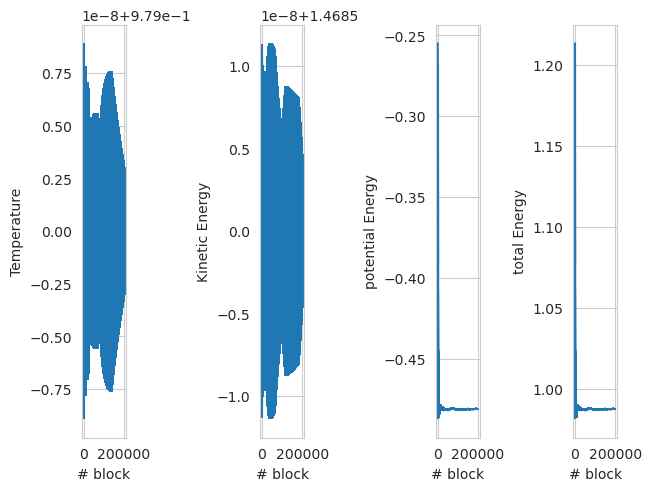

In [20]:
fig, axs = plt.subplots(1, 4, sharex=True, layout="constrained")
# Temperatura
axs[0].errorbar("block", "t_ave", "error", data=df_solid_temperature)
axs[0].set_xlabel("# block")
axs[0].set_ylabel("Temperature")

# Kinetic Energy
axs[1].errorbar("block", "ke_ave", "error", data=df_kinetic_energy)
axs[1].set_xlabel("# block")
axs[1].set_ylabel('Kinetic Energy')

# Potential Energy
axs[2].errorbar("block", "pe_ave", "error", data=df_potential_energy)
axs[2].set_xlabel("# block")
axs[2].set_ylabel('potential Energy')

# Total energy
axs[3].errorbar("block", "te_ave", "error", data=df_total_energy)
axs[3].set_xlabel("# block")
axs[3].set_ylabel('total Energy')

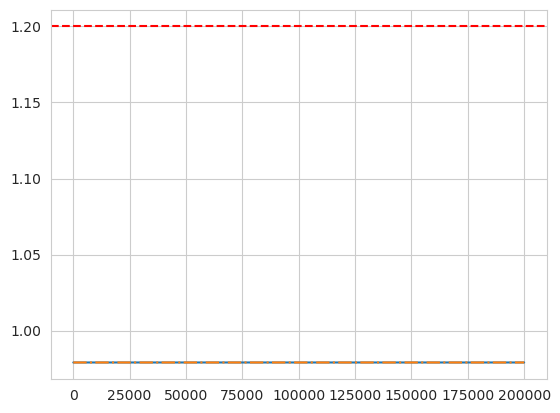

In [23]:
# plt.plot("block", "actual_p", data=df_pressure)
plt.plot("block", "actual_t", data=df_solid_temperature)
plt.plot("block", "t_ave", data=df_solid_temperature, linestyle ='-.')
plt.axhline(1.2, linestyle='--', color='red')

- La Temperatura per i solidi di partenza è 1.55
- La Temperatura per i liquidi di partenza è 1.977 
- La Temperatura per i gas di parteza è 0.979

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

In gas the temperature raises rather than diminishing